In [1]:
import os
from os.path import exists, join

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tifffile import imread
import ffmpeg
from matplotlib.animation import FuncAnimation

pd.options.mode.chained_assignment = None  # default='warn'

### Fig3 escape of RNA

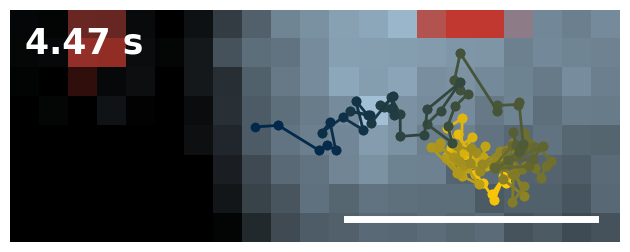

In [9]:
um_per_pixel = 0.117
s_per_frame = 0.03
folder_data = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_specs to functions/multi_stage_diffusion_examples/selected_montage"
folder_save = "/Users/GGM/Documents/Graduate_Work/Nils_Walter_Lab/Writing/MyPublications/SMT_FUS_Nanodomain-Nat2024"

os.chdir(folder_data)
video = imread("Merged_cropped_3stage_leaving.tif")
df = pd.read_csv("track.csv")
df = df.sort_values("t")

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

cmap_color_start = (0.753, 0.22, 0.188, 0)
cmap_color_end = (0.753, 0.22, 0.188, 1)
cmap_name = "transparent2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

fig, ax = plt.subplots(1, 1)
all_avaliable_frames = set(df["t"].unique())

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"
N = df.shape[0]
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=N
)


def animate(frame):
    ax.clear()
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=3100,
        vmax=5600,
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=2,
        vmax=6,
    )
    # add time stamp
    plt.text(
        0,
        1,
        str(round(frame * s_per_frame, 2)) + " s",
        color="white",
        weight="bold",
        size=25,
    )

    # Add a single current circle, except for gaps
    if frame - 1 in all_avaliable_frames:
        current_x = df[df["t"] == frame - 1]["x"].squeeze()
        current_y = df[df["t"] == frame - 1]["y"].squeeze()
        c = plt.Circle(
            (current_x, current_y),
            1.3,
            color="white",
            fill=False,
            lw=3,
        )
        ax.add_patch(c)
    # Add a single track
    track = df[df["t"] <= frame - 1]
    t_plot = track["t"].to_numpy(float)
    x_plot = track["x"].to_numpy(float)
    y_plot = track["y"].to_numpy(float)
    for i in range(len(t_plot) - 1):
        plt.plot(
            x_plot[i : i + 2],
            y_plot[i : i + 2],
            "-o",
            color=cmap(i / N),
            lw=2,
        )
    # scale bar
    scale_bar_offset = 0
    scalebar_length_um = 1
    base_x = 11.1
    base_y = 6.7
    scalebar_length_pxl = scalebar_length_um / um_per_pixel
    plt.plot(
        [
            base_x + scale_bar_offset,
            base_x + scale_bar_offset + scalebar_length_pxl,
        ],
        [base_y + scale_bar_offset, base_y + scale_bar_offset],
        "-",
        color="white",
        lw=5,
    )
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    ax.invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")


ani = FuncAnimation(fig, animate, frames=150, interval=20, repeat=False)
writer = animation.FFMpegWriter(fps=25)  # 25 Hz, 0.5x playback (original:50Hz)
ani.save(join(folder_save, "VideoS_RNA_escape.mp4"), writer=writer)

### SMT-PAINT of FUS

In [ ]:
um_per_pixel = 0.117
s_per_frame = 0.03
folder_data = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_specs to functions/multi_stage_diffusion_examples/selected_montage"
folder_save = "/Users/GGM/Documents/Graduate_Work/Nils_Walter_Lab/Writing/MyPublications/SMT_FUS_Nanodomain-Nat2024"

os.chdir(folder_data)
video = imread("Merged_cropped_3stage_leaving.tif")
df = pd.read_csv("track.csv")
df = df.sort_values("t")

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

cmap_color_start = (0.753, 0.22, 0.188, 0)
cmap_color_end = (0.753, 0.22, 0.188, 1)
cmap_name = "transparent2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
)

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

fig, ax = plt.subplots(1, 1)
all_avaliable_frames = set(df["t"].unique())

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"
N = df.shape[0]
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=N
)


def animate(frame):
    ax.clear()
    img_blue = video[frame - 1, 1, :, :]
    img_red = video[frame - 1, 0, :, :]
    plt.imshow(
        img_blue,
        cmap=cmap_blue,
        vmin=3100,
        vmax=5600,
    )
    plt.imshow(
        img_red,
        cmap=cmap_red,
        vmin=2,
        vmax=6,
    )
    # add time stamp
    plt.text(
        0,
        1,
        str(round(frame * s_per_frame, 2)) + " s",
        color="white",
        weight="bold",
        size=25,
    )

    # Add a single current circle, except for gaps
    if frame - 1 in all_avaliable_frames:
        current_x = df[df["t"] == frame - 1]["x"].squeeze()
        current_y = df[df["t"] == frame - 1]["y"].squeeze()
        c = plt.Circle(
            (current_x, current_y),
            1.3,
            color="white",
            fill=False,
            lw=3,
        )
        ax.add_patch(c)
    # Add a single track
    track = df[df["t"] <= frame - 1]
    t_plot = track["t"].to_numpy(float)
    x_plot = track["x"].to_numpy(float)
    y_plot = track["y"].to_numpy(float)
    for i in range(len(t_plot) - 1):
        plt.plot(
            x_plot[i : i + 2],
            y_plot[i : i + 2],
            "-o",
            color=cmap(i / N),
            lw=2,
        )
    # scale bar
    scale_bar_offset = 0
    scalebar_length_um = 1
    base_x = 11.1
    base_y = 6.7
    scalebar_length_pxl = scalebar_length_um / um_per_pixel
    plt.plot(
        [
            base_x + scale_bar_offset,
            base_x + scale_bar_offset + scalebar_length_pxl,
        ],
        [base_y + scale_bar_offset, base_y + scale_bar_offset],
        "-",
        color="white",
        lw=5,
    )
    plt.xlim(0, img_blue.shape[0])
    plt.ylim(0, img_blue.shape[1])
    ax.invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")


ani = FuncAnimation(fig, animate, frames=150, interval=20, repeat=False)
writer = animation.FFMpegWriter(fps=25)  # 25 Hz, 0.5x playback (original:50Hz)
ani.save(join(folder_save, "VideoS_RNA_escape.mp4"), writer=writer)